## Load DLC tracking files

Some packages are required for this to run smoothly (try `pip install` PACKAGE_NAME ). 
Specifically:
- numpy (general)
- pandas (the most awesome python package in history - I load the h5 file with this)
- matplotlib (for plotting)
- seaborn (just to make figures look nicer)
- pickle (I think it is pre-installed though)
- easydict

In [1]:
import sys, os
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
%config InlineBackend.figure_format = 'retina'

In [2]:
import pickle
from easydict import EasyDict

### Pickle file

This is all the metadata ... here is how to load it

In [3]:
pickle_file = 'F:/Flavio/2P/L9M1/24012019/DLC/MUnit_0/BaslerC1 (22833998)_20190124_13193569_L9M1_240119_P16_MUnit_0DeepCut_resnet50_FlavioDevelop2Feb2shuffle1_550000includingmetadata.pickle'

In [4]:
with open(pickle_file, 'rb') as f: #same as in SaveData!
    metadata = pickle.load(f)

In [5]:
metadata

{'data': {'start': 1550543213.8818958,
  'stop': 1550553388.0850186,
  'run_duration': 10174.203122854233,
  'Scorer': 'DeepCut_resnet50_FlavioDevelop2Feb2shuffle1_550000',
  'DLC-model-config file': {'stride': 8.0,
   'weigh_part_predictions': False,
   'weigh_negatives': False,
   'fg_fraction': 0.25,
   'weigh_only_present_joints': False,
   'mean_pixel': [123.68, 116.779, 103.939],
   'shuffle': True,
   'snapshot_prefix': 'F:\\DLC\\FlavioDevelop\\dlc-models\\iteration-0\\FlavioDevelop2Feb2-trainset95shuffle1\\test\\snapshot',
   'log_dir': 'log',
   'global_scale': 0.8,
   'location_refinement': True,
   'locref_stdev': 7.2801,
   'locref_loss_weight': 1.0,
   'locref_huber_loss': True,
   'optimizer': 'sgd',
   'intermediate_supervision': False,
   'intermediate_supervision_layer': 12,
   'regularize': False,
   'weight_decay': 0.0001,
   'mirror': False,
   'crop_pad': 0,
   'scoremap_dir': 'test',
   'dataset_type': 'default',
   'use_gt_segm': False,
   'batch_size': 4,
   'vi

### h5 file

In [6]:
h5_file = 'F:/Flavio/2P/L9M1/31012019/DLC_MUnit_0/BaslerC1 (22833998)_20190131_110204363_L9M1_310119_P23_MUnit_0DeepCut_resnet50_FlavioDevelop2Feb2shuffle1_550000.h5'
try:
    Dataframe = pd.read_hdf(h5_file)

except FileNotFoundError:
    print("Data was not found.")

I load it with pandas. It is very neat because now you have it all in a nice so called "dataframe". That allows you to do some nice indexing and most importantly display everything nicely. If you call `.head()` on a dataframe you see the top of the data. If you want to see the end of the data type `.tail()`

In [7]:
Dataframe.head()

scorer    DeepCut_resnet50_FlavioDevelop2Feb2shuffle1_550000              \
bodyparts                                 front_paw_left_out               
coords                                                     x           y   
0                                                 341.767702  268.200164   
1                                                 341.443288  268.069104   
2                                                 341.457221  268.003640   
3                                                 341.467193  268.153945   
4                                                 341.602006  268.139247   

scorer                                                         \
bodyparts            front_paw_left_in                          
coords    likelihood                 x           y likelihood   
0                1.0        382.115849  245.599891        1.0   
1                1.0        382.692885  245.632436        1.0   
2                1.0        382.575387  245.606778        1.0   
3                1.0        382.518600  245.554312        1.0   
4                1.0        382.257595  245.692054        1.0   

scorer                                                               \
bodyparts hind_paw_left_out                        hind_paw_left_in   
coords                    x           y likelihood                x   
0                484.950601  307.819286        1.0       533.163720   
1                485.433771  308.148602        1.0       533.090935   
2                485.516870  308.220387        1.0       533.521935   
3                485.659619  308.347649        1.0       533.630640   
4                485.770656  309.116439        1.0       533.836008   

scorer                                                               
bodyparts                         tail_point                         
coords              y likelihood           x           y likelihood  
0          291.964449        1.0  328.057660  265.273313   0.000580  
1          292.583016        1.0  327.959803  265.327183   0.000485  
2          292.341543        1.0  327.963984  265.266040   0.000419  
3          292.692819        1.0  395.954031  238.985458   0.000392  
4          292.868663        1.0  399.578621  254.564862   0.000424

However, the dataframe is a bit tricky to access since it has multiple "header" layers (see the bold column names that have multiple layers). But you can easily go down the hierarchy "dot by dot" ... see below

In [8]:
Dataframe.columns.levels

FrozenList([['DeepCut_resnet50_FlavioDevelop2Feb2shuffle1_550000'], ['front_paw_left_in', 'front_paw_left_out', 'hind_paw_left_in', 'hind_paw_left_out', 'tail_point'], ['likelihood', 'x', 'y']])

So you see there are different "levels" in this dataframe. The top level is just the name of the classifier (`DeepCut_resnet50_FlavioDevelop2Feb2shuffle1_550000`), one level deeper is the body part list (`'front_paw_left_in', 'front_paw_left_out', 'hind_paw_left_in', 'hind_paw_left_out', 'tail_point'`) and then for each body part you have multiple attributes: `'likelihood', 'x', 'y'`. You can switch between those to access by adding "dots" in between each level ... 

In [9]:
Dataframe.DeepCut_resnet50_FlavioDevelop2Feb2shuffle1_550000.head()

bodyparts front_paw_left_out                        front_paw_left_in  \
coords                     x           y likelihood                 x   
0                 341.767702  268.200164        1.0        382.115849   
1                 341.443288  268.069104        1.0        382.692885   
2                 341.457221  268.003640        1.0        382.575387   
3                 341.467193  268.153945        1.0        382.518600   
4                 341.602006  268.139247        1.0        382.257595   

bodyparts                        hind_paw_left_out                         \
coords              y likelihood                 x           y likelihood   
0          245.599891        1.0        484.950601  307.819286        1.0   
1          245.632436        1.0        485.433771  308.148602        1.0   
2          245.606778        1.0        485.516870  308.220387        1.0   
3          245.554312        1.0        485.659619  308.347649        1.0   
4          245.692054        1.0        485.770656  309.116439        1.0   

bodyparts hind_paw_left_in                         tail_point              \
coords                   x           y likelihood           x           y   
0               533.163720  291.964449        1.0  328.057660  265.273313   
1               533.090935  292.583016        1.0  327.959803  265.327183   
2               533.521935  292.341543        1.0  327.963984  265.266040   
3               533.630640  292.692819        1.0  395.954031  238.985458   
4               533.836008  292.868663        1.0  399.578621  254.564862   

bodyparts             
coords    likelihood  
0           0.000580  
1           0.000485  
2           0.000419  
3           0.000392  
4           0.000424

Here is one sub-group (the tracking data for the bodypart "fron_paw_left_in")

In [10]:
Dataframe.DeepCut_resnet50_FlavioDevelop2Feb2shuffle1_550000.front_paw_left_in.head()

coords,x,y,likelihood
0,382.115849,245.599891,1.0
1,382.692885,245.632436,1.0
2,382.575387,245.606778,1.0
3,382.518600,245.554312,1.0
4,382.257595,245.692054,1.0


Once you isolated those sublevels you can plot whatever ... 
Below I am creating a scatter plot of the `front_paw_left_out` x and y coordinate and the `hind_paw_left_out` x and y coordinate

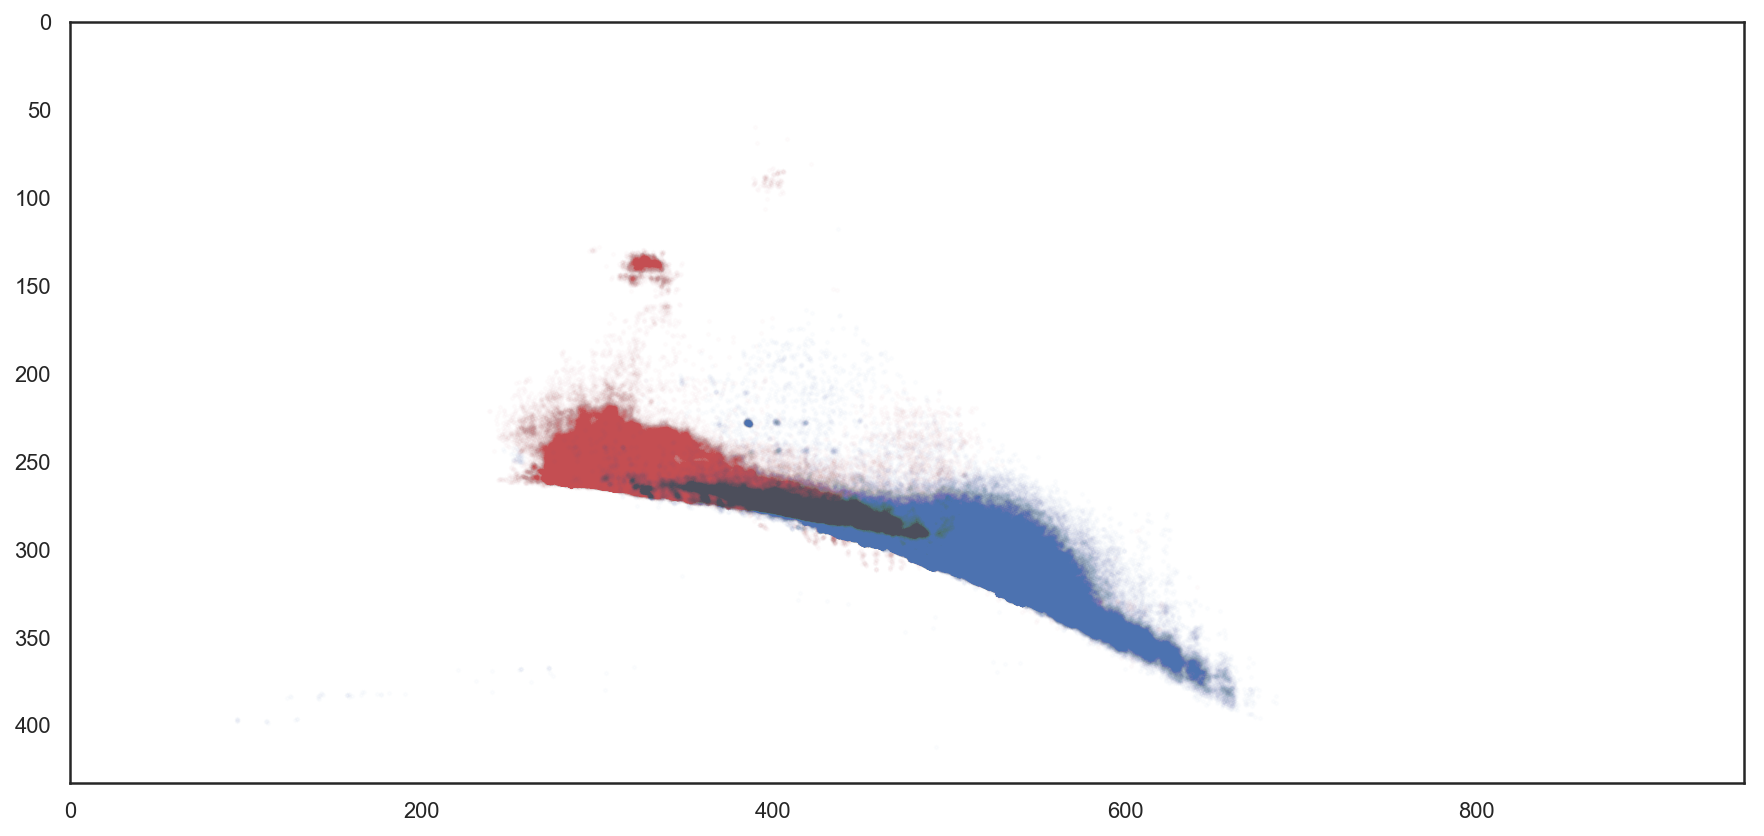

In [11]:
figure = plt.figure(figsize=(15,7))
ax = figure.add_subplot(111)
ax.scatter(Dataframe.DeepCut_resnet50_FlavioDevelop2Feb2shuffle1_550000.front_paw_left_out.x, Dataframe.DeepCut_resnet50_FlavioDevelop2Feb2shuffle1_550000.front_paw_left_out.y,s=3,alpha=.01,c='r')
ax.scatter(Dataframe.DeepCut_resnet50_FlavioDevelop2Feb2shuffle1_550000.hind_paw_left_out.x, Dataframe.DeepCut_resnet50_FlavioDevelop2Feb2shuffle1_550000.hind_paw_left_out.y,s=3,alpha=.01,c='b')

ax.set_xlim(0,952)
ax.set_ylim(0,433)
ax.invert_yaxis()

And here I am just plotting the x and y coordinate over time (frames):

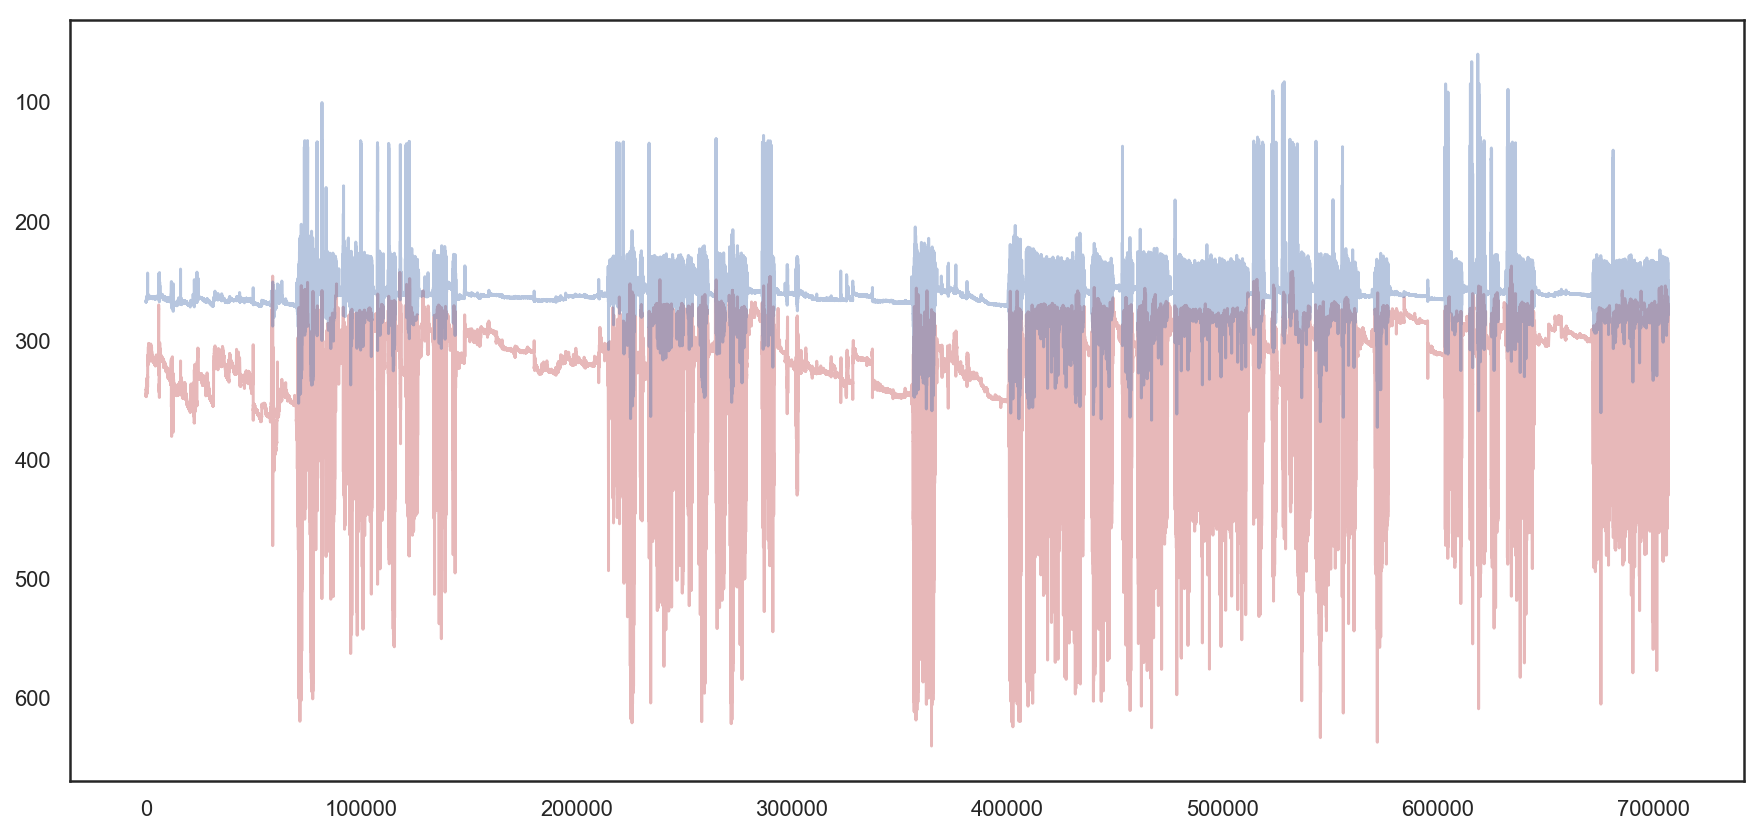

In [12]:
figure = plt.figure(figsize=(15,7))
ax = figure.add_subplot(111)
ax.plot(Dataframe.DeepCut_resnet50_FlavioDevelop2Feb2shuffle1_550000.front_paw_left_out.x,alpha=.4,c='r')
ax.plot(Dataframe.DeepCut_resnet50_FlavioDevelop2Feb2shuffle1_550000.front_paw_left_out.y,alpha=.4,c='b')

#ax.set_xlim(0,952)
#ax.set_ylim(0,433)
ax.invert_yaxis()

### Occupancy

For displaying occupancy you calculate a 2D histogram of the x-y-tracking data. Then you can smooth it. 
For smoothing I use a scipy package, so `pip install scipy` once! 

In [13]:
from scipy.ndimage.filters import gaussian_filter1d, gaussian_filter

In [14]:
bins_size = 10 # pixels
height, width = metadata['data']['frame_dimensions'] # This is the pickle metadata from above
smoothing_sigma = 2

In [15]:
x_pos = Dataframe.DeepCut_resnet50_FlavioDevelop2Feb2shuffle1_550000.front_paw_left_out.x
y_pos = Dataframe.DeepCut_resnet50_FlavioDevelop2Feb2shuffle1_550000.front_paw_left_out.y

In [16]:
nbins_width  = int(width/bins_size)
nbins_height = int(height/bins_size)

if (nbins_width < 10) or (nbins_height < 10):
    raise ValueError('Less than 10 bins in map. That is not nice.')
    
# Extract range from tracking data 
range_ = [[0, height],\
          [0, width]]

histogram, yedges, xedges  = np.histogram2d(y_pos,\
                                            x_pos, bins=[nbins_height,nbins_width],range=range_)

histogram = np.array(histogram, dtype=float)
histogram_original = histogram

histogram = gaussian_filter(histogram, sigma=smoothing_sigma, mode='nearest')

# Mask the bins that have never been visited
masked_histogram = np.ma.masked_where(histogram_original==0, histogram)

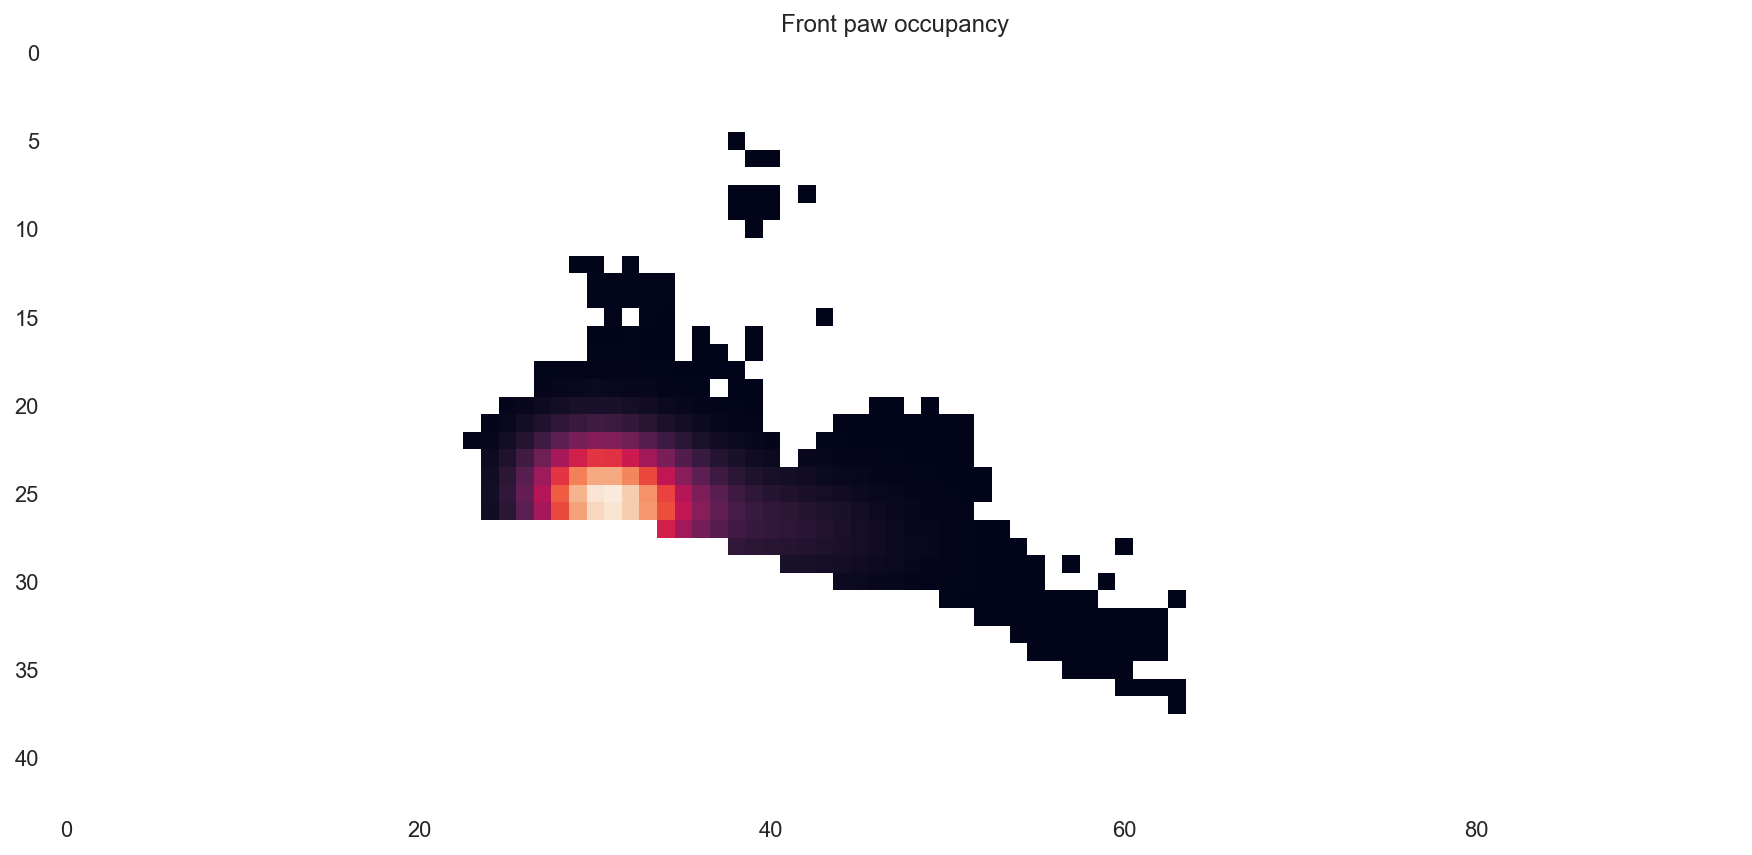

In [17]:
figure = plt.figure(figsize=(15,8))
plt.imshow(masked_histogram)
plt.title('Front paw occupancy')
sns.despine(left=True,bottom=True)